In [1]:

import tensorflow as tf
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
tf.keras.backend.set_floatx('float64')
from misc import *
from collections import deque
from nets import Q2, Actor
import random


class Q2(tf.keras.Model):
    def __init__(self):
        super(Q2,self).__init__()

        self.l1 = Dense(5, input_shape=(3,),kernel_initializer=tf.random_uniform_initializer(),
        bias_initializer = tf.random_uniform_initializer(),
        kernel_regularizer=tf.keras.regularizers.l1(0.01),
    activity_regularizer=tf.keras.regularizers.l2(0.01))

        self.l2 = Dense(5, kernel_regularizer=tf.keras.regularizers.l1(0.01),
    activity_regularizer=tf.keras.regularizers.l2(0.01),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())
        self.l3 = Dense(10, kernel_regularizer=tf.keras.regularizers.l1(0.01),
    activity_regularizer=tf.keras.regularizers.l2(0.01),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())
        self.l5 = Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.01),
    activity_regularizer=tf.keras.regularizers.l2(0.01),
    kernel_initializer=tf.random_uniform_initializer(),
    bias_initializer = tf.random_uniform_initializer())

    #def call(self, input):
     #   feat = tf.nn.sigmoid(self.l1(input))
        #feat = tf.nn.relu(self.l2(feat))
        #feat = tf.nn.relu(self.l3(feat))
      #  value = tf.nn.sigmoid(self.l5(feat))
       # return value

    def call(self, inputcat, inputcont):
        feat = tf.nn.sigmoid(self.l1(inputcat))
        feat = tf.nn.relu(self.l2(feat))
        feat = tf.nn.relu(self.l3(feat))
        concat = tf.concat([inputcat, inputcont], axis=0)
        feat = tf.nn.relu(self.l5(concat))
        return feat
        
    def predict(self, history_one):
        inp = np.expand_dims(history_one, axis=0)
        return np.squeeze(self(inp).numpy())

    def initialize(self):
        inp = np.expand_dims(np.array([[0.],[0.],[0.]]),axis=1)
        self(inp)
        return

    def __str__(self):
        return self.name


In [570]:

def create_dataset(size_dataset=10**3, splits=10):
    betas = np.arange(-1,0,.01)

    dataset = []
    for i in range(size_dataset):
        ph = np.random.choice([-1,1],1)[0]

        l = np.random.choice(range(len(betas)),1)[0]
        b = betas[l]

        p0 = Prob(ph*0.4, b, 0)
        outcome = np.random.choice([0.,1.], 1, p=[p0,1-p0])[0]
        action_guess = np.random.choice([1.,-1.], 1)[0]
    
        po1=np.sum([Prob(pp*0.4,b,outcome) for pp in [-1,1]])
        probrew = Prob(action_guess*0.4, b, outcome)/po1  #UNKNOWN TO AGENT OF COURSE
        reward = np.random.choice([1.,0.],1, p=[probrew, 1-probrew])[0]
        dataset.append([[b, (-1.)**outcome, action_guess], reward])
    data = np.split(np.array(dataset), splits+(len(dataset)%splits ))
    return data

In [571]:
def epocheando(data):
    for batch in range(len(data)):
        entriescont = []
        entriescat = []
        labels=[]
        for k in data[batch]:
            entries.append([k[0][1:3]])
            entriescont.append([k[0][0]])
            labels.append(k[1])

        with tf.GradientTape() as tape:
            tape.watch(q2.trainable_variables)
            preds = q2(np.expand_dims(entries,axis=1))
            loss =tf.keras.losses.MSE(np.expand_dims(labels,axis=1),preds)
    #loss = tf.keras.losses.binary_crossentropy(np.expand_dims(labels,axis=1), preds)
            loss = tf.reduce_mean(loss)
            grads = tape.gradient(loss,q2.trainable_variables)
            opt.apply_gradients(zip(grads, q2.trainable_variables))
    return loss

In [572]:
q2 = Q2()
data = create_dataset(10**3, 1)
opt = tf.keras.optimizers.Adam(lr=10**-3)
l=[]
N = 10**2
for ep in range(N):
    l.append(epocheando(data))
    if ep%(N/10) == 1:
        print(ep, "/", N)
plt.plot(l)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

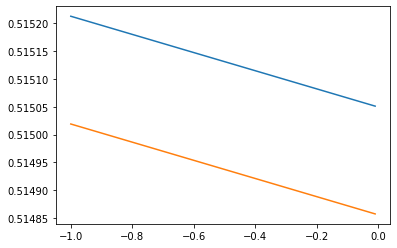

In [554]:
betas = np.arange(-1,0,.01)
histplus, histmin = [], []
for k in betas:
    histmin.append([k,0., -1.])
    histplus.append([k,1.,+1])
    
plt.plot(betas, np.squeeze(q2(np.expand_dims(histplus,axis=1))))
plt.plot(betas, np.squeeze(q2(np.expand_dims(histmin,axis=1))))

array(0.48606479)

In [562]:
q2(np.expand_dims([[-.5,0.,+1.]],axis=1))

<tf.Tensor: shape=(1, 1, 1), dtype=float64, numpy=array([[[0.51493766]]])>